## Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods (Week 1)

## The Task

This project, and associated files, were produced as to meet the final objectives of Coursera's IBM Applied Data Science Capstone Certificate program. The following sections are the objectives in meeting this criteria.

Section 1: Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem. This submission will eventually become your Introduction/Business Problem section in your final report. So I recommend that you push the report (having your Introduction/Business Problem section only for now) to your Github repository and submit a link to it.

Section 2: Describe the data that you will be using to solve the problem or execute your idea. Remember that you will need to use the Foursquare location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location data. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data. This submission will eventually become your Data section in your final report. So I recommend that you push the report (having your Data section) to your Github repository and submit a link to it.

## 1.Problem Description and Background discussion 

#### Determining suitable locations to set up quarantine centres in New York city due to massive outbreak of COVID-19

<strong>1.1.Background:</strong>
<br><br>
Due to the outbreak of the highly contagious and deadly corona(COVID-19) virus the world is witnessing deaths ,panics and
health hazard.The virus is showing no sign to stop and by the time the vaccine comes out the only way to protect ourselves is to make social distancing among ourselves.The government has set up quarantine centres in New York city to keep the virus affected patients and those having travel history in recent past for 14 days in those locations.<br>
However,the disease being highly contagious,it is very important to set up the quarantine stations in those places where the population is low and and the health fecilities like hospitals are also near to those stations.<br>
The neighbourhood data with the geo locations will give us data about the locations where there is a possibility of mass gathering.So when the government decides to start the unlock phase it will be easier for them to decide what places to open and what not to avoid the mass gathering. <br><br>

<strong>1.2 Business Problem:</strong><br>

So the main idea behind this project is two-fold. First, it's to analyse the population data of New York city to check what places of the city is less populous so that government can set quarantine centres in those locations and second is to identify the places where there could be possibility of mass gathering so that those places could be taken under surveillance.

## 2. Data Sources

#### 1.Population Data of US 

To analyse the population data of the New York city we need to anayse the a data set containing the post codes of the city and the population.From this dataset available in Kaggle we get the population data of the year 2010 for the whole country.
<br>LINK: http://zipatlas.com/us/ny/zip-code-comparison/population-density.htm

#### 2. Post codes of New York

Now from the population data of the whole United States we need to determine the population of the Zip codes of various locations of New York.So we merge the the previous dataframe with this data frame on the postcodes.
<br>Link: https://www.zipcodestogo.com/New%20York/

#### 3.Postcode Geolocation

Now to access the neighbourhood we need to get the geolocatons of the differnet postcodes of New York city.The data set that gives the geolocations and the postcodes is given below.<br>

Link : https://cocl.us/new_york_dataset

#### 4.Foursquare API data

Now to access the possible locations where mass gathering can take place,we use the Foursquare API data with our own client ID.We take a given radious and set the latitude and longitude of new york to get the locations of various points of gathering.The data can be derived from the Foursquare's website.<br>
Link: https://foursquare.com/

## Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods (Week 2)

### Github Python Notebook

In [227]:
# Importing Important Libraries 

import pandas as pd 
import numpy as np 
import requests
import json
from bs4 import BeautifulSoup
import folium
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


In [228]:
# Web Scrapping using BeautifulSoup 

with open('NY_Population.html') as html_file:
    soup=BeautifulSoup(html_file,'lxml')

table = soup.find('table')
table
population_df = pd.read_html(str(table))[0]
population_df.drop(population_df.index[0:15],inplace=True)
population_df=population_df.reset_index(drop=True)
population_df.drop(columns=[0,2,3,5,6],inplace=True)
population_df=population_df.rename(columns={1:'zipcode',4:'population'}) 
population_df.head()
#population_df.shape


,zipcode,population
0,10162,1726
1,10028,44987
2,10128,59856
3,10031,60221
4,10009,58595


In [229]:
# Web Scrapping using beautifulSoup and making zipcode vs Population dataframe

with open('NY_Population2.html') as html_file:
    soup=BeautifulSoup(html_file,'lxml')

table = soup.find('table')
table
population_df1 = pd.read_html(str(table))[0]
population_df1.drop(population_df1.index[0:15],inplace=True)
population_df1=population_df1.reset_index(drop=True)
population_df1.drop(columns=[0,2,3,5,6],inplace=True)
population_df1=population_df1.rename(columns={1:'zipcode',4:'population'}) 
population_df1.head()

,zipcode,population
0,11385,97524
1,10473,56166
2,10001,17310
3,11432,57045
4,11417,28607


In [230]:
# concatinating 2 dataframes
frames = [population_df,population_df1]
Population = pd.concat(frames)
Population.head(5)

,zipcode,population
0,10162,1726
1,10028,44987
2,10128,59856
3,10031,60221
4,10009,58595


In [231]:
# Using BeautifulSoup to make zipcode vs Borough Dataframe

with open('NY_Zip.html') as html_file:
    soup=BeautifulSoup(html_file,'lxml')
#print(soup.prettify())
table = soup.find('table')
table
Zip_df = pd.read_html(str(table))[0]
Zip_df.drop(Zip_df.index[[0,1,2]],inplace=True)
Zip_df=Zip_df.rename(columns={0:'zipcode',1:'Borough',2:'county',3:'map'}) 
Zip_df.drop(columns=['county','map'],inplace=True)
Zip_df = Zip_df.reset_index(drop=True)
Zip_df.head()

,zipcode,Borough
0,00501,Holtsville
1,00544,Holtsville
2,06390,Fishers Island
3,10001,New York
4,10002,New York


In [301]:
# Merging the 2 dataframes

df1 = pd.merge(Zip_df,Population,on="zipcode", how='left')
df1.head(10)
df1.dropna( axis=0, how='any', thresh=None, subset=None, inplace=True)
df1.head(5)

,zipcode,Borough,population
3,10001,New York,17310
4,10002,New York,84870
5,10003,New York,53673
7,10005,New York,884
8,10006,New York,1447


In [311]:
# Extracting Geo location of the neighbourhood datas and Borough and making dataframes

with open('nyu_2451_34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)
neighborhoods_data = newyork_data['features']
neighborhoods_data
neighborhoods_data[0]
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods.head(3)
#neighborhoods.shape

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806


In [304]:
df = pd.merge(df1,neighborhoods,on="Borough", how='left')        #Merging the 2 dataframes from left
df.head()

,zipcode,Borough,population,Neighborhood,Latitude,Longitude
0,10001,New York,17310,NaN,NaN,NaN
1,10002,New York,84870,NaN,NaN,NaN
2,10003,New York,53673,NaN,NaN,NaN
3,10005,New York,884,NaN,NaN,NaN
4,10006,New York,1447,NaN,NaN,NaN


In [305]:
# Handling Missin values 
# Dropping those rows having Missing Values

df.isnull().sum()
df.dropna( axis=0, how='any',inplace=True)
df = df.reset_index(drop=True)                             #Resetting Index

In [306]:
df.head()

,zipcode,Borough,population,Neighborhood,Latitude,Longitude
0,10301,Staten Island,38805,St. George,40.644982,-74.079353
1,10301,Staten Island,38805,New Brighton,40.640615,-74.087017
2,10301,Staten Island,38805,Stapleton,40.626928,-74.077902
3,10301,Staten Island,38805,Rosebank,40.615305,-74.069805
4,10301,Staten Island,38805,West Brighton,40.631879,-74.107182


The Plot Shows Brooklyn has most Number of Neighbourhoods so the population of Brooklyn is likely to be more. So Special care needs to be taken to control the corona virus spread


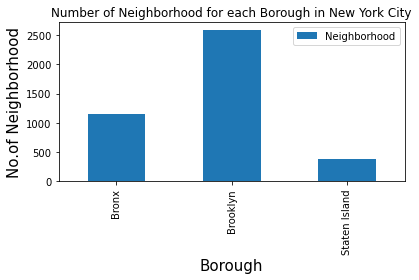

In [310]:
# PLotting which Borough in NY has the most number of Neighbourhoods

# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
df.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.savefig('BoroughBarplot.png')
print("The Plot Shows Brooklyn has most Number of Neighbourhoods so the population of Brooklyn is likely to be more. So Special care needs to be taken to control the corona virus spread")
plt.tight_layout()


As Brooklyn has most number of Neighborhoods so lets examine the demographic of Brooklyn

In [291]:
df.population=df.population.astype('int')                 # Making population datatype as integer 
df.zipcode=df.zipcode.astype('int')                       # Making zipcode datatype as integer
filter=df['Borough']=="Brooklyn"                          # filter only for Brooklyn Borough
df=df.loc[filter]
df=df.sort_values(by='population',ascending=True)         # Sorting population from Low to High
df = df.reset_index(drop=True)
df.head(10)

,zipcode,Borough,population,Neighborhood,Latitude,Longitude
0,11239,Brooklyn,14620,Erasmus,40.646926,-73.948177
1,11239,Brooklyn,14620,Brooklyn Heights,40.695864,-73.993782
2,11239,Brooklyn,14620,Cobble Hill,40.687920,-73.998561
3,11239,Brooklyn,14620,Carroll Gardens,40.680540,-73.994654
4,11239,Brooklyn,14620,Red Hook,40.676253,-74.012759
5,11239,Brooklyn,14620,Gowanus,40.673931,-73.994441
6,11239,Brooklyn,14620,Fort Greene,40.688527,-73.972906
7,11239,Brooklyn,14620,Bedford Stuyvesant,40.687232,-73.941785
8,11239,Brooklyn,14620,Park Slope,40.672321,-73.977050
9,11239,Brooklyn,14620,East New York,40.669926,-73.880699


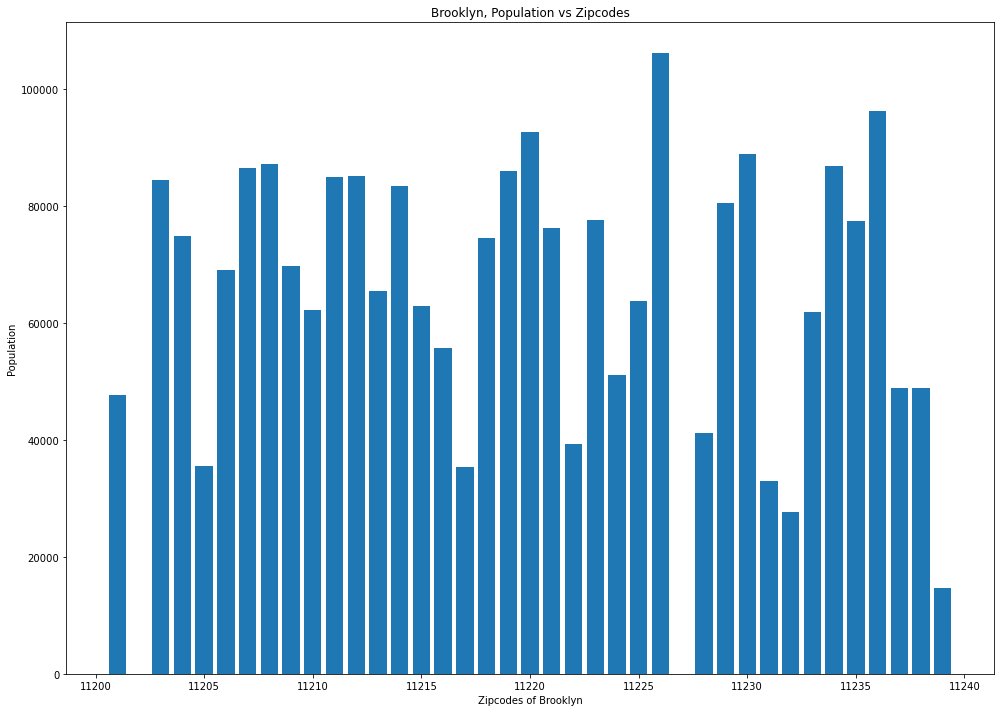

In [292]:
# Plotting Zipcode Vs Population to get an idea about the Population distribution in different places 

x=df.zipcode
y=df.population
plt.figure(figsize=(14,10))
plt.xlabel('Zipcodes of Brooklyn')
plt.ylabel('Population')
plt.title("Brooklyn, Population vs Zipcodes")
plt.bar(x,y)
plt.tight_layout()
plt.savefig('PopulationVsZipBarplot.png')     #Saving The Image

In [294]:
#Multi Indexing the datas to get the Neighborhood Information 
#In a given zipcode of Brooklyn the population is same 

df2=df.set_index(['zipcode','population'])
df2

Borough      Neighborhood   Latitude  Longitude
zipcode population                                                  
11239   14620       Brooklyn           Erasmus  40.646926 -73.948177
        14620       Brooklyn  Brooklyn Heights  40.695864 -73.993782
        14620       Brooklyn       Cobble Hill  40.687920 -73.998561
        14620       Brooklyn   Carroll Gardens  40.680540 -73.994654
        14620       Brooklyn          Red Hook  40.676253 -74.012759
...                      ...               ...        ...        ...
11226   106154      Brooklyn          Red Hook  40.676253 -74.012759
        106154      Brooklyn   Carroll Gardens  40.680540 -73.994654
        106154      Brooklyn       Cobble Hill  40.687920 -73.998561
        106154      Brooklyn     Cypress Hills  40.682391 -73.876616
        106154      Brooklyn     Dyker Heights  40.619219 -74.019314

[2590 rows x 4 columns]

In [295]:
address = 'Brooklyn, New York, USA'                            # Address of the location which is to be examined

geolocator = Nominatim(user_agent="NY_Traveller")
location = geolocator.geocode(address)                 # To access the location of the given adress
latitude = location.latitude                           # To access the latitude of Brooklyn,NY,USA
longitude = location.longitude                         # To access the Longitude of Brooklyn,NY,USA

print('The geograpical coordinate of NY is : {}, {}.'.format(latitude, longitude))

The geograpical coordinate of NY is : 40.6501038, -73.9495823.


Observing the Map of Brooklyn

In [296]:
# create map of Toronto using latitude and longitude values
map_NY = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood ,population in zip(df['Latitude'], df['Longitude'],
                                                                df['Borough'],df['Neighborhood'],df['population']):
    label = '{}, {}'.format(neighborhood,population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html=False).add_to(map_NY)  
    
map_NY

In [198]:
CLIENT_ID="LPYCJIALAJDLBBT31E4ES13IPEWMCDYK5U3WBGXWBNGWM3AF"            # Foursquare ID of User
CLIENT_SECRET="2TRPJHGRCOFPWS1QVERZB1JXZ5DTBYOH0HLDKN2US5XXVPLQ"        # Foursquare client_secret of user
VERSION = '20180604'
print('My Foursquare credentails :')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My Foursquare credentails :
CLIENT_ID: LPYCJIALAJDLBBT31E4ES13IPEWMCDYK5U3WBGXWBNGWM3AF
CLIENT_SECRET:2TRPJHGRCOFPWS1QVERZB1JXZ5DTBYOH0HLDKN2US5XXVPLQ


In [264]:
# Erasmus is in the heart of Brooklyn so lets Examine the Neighbourhood of Erasmus
Filter=df['Neighborhood'].str.contains('Dumbo')
Df=df.loc[Filter]
Df = Df.reset_index(drop=True)
Df.head(1)

,zipcode,Borough,population,Neighborhood,Latitude,Longitude
0,11239,Brooklyn,14620,Dumbo,40.703176,-73.988753


In [265]:
radius=100000           
LIMIT=10000
neighborhood_latitude=Df.loc[0,"Latitude"]
neighborhood_longitude=Df.loc[0,"Longitude"]
neighbourhood_name = Df.loc[0, 'Neighborhood']


url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

print("The Foursquare URL to extract the Erasmus Neighbourhood data is :",url)

The Foursquare URL to extract the Erasmus Neighbourhood data is : https://api.foursquare.com/v2/venues/explore?&client_id=LPYCJIALAJDLBBT31E4ES13IPEWMCDYK5U3WBGXWBNGWM3AF&client_secret=2TRPJHGRCOFPWS1QVERZB1JXZ5DTBYOH0HLDKN2US5XXVPLQ&v=20180604&ll=40.70317632822692,-73.9887528074504&radius=100000&limit=10000


In [266]:
#Making Json file from the url made
results = requests.get(url).json()
#results
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [267]:
venues = results['response']['groups'][0]['items']
nearby_venues = pd.json_normalize(venues)                        # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues["Neighbourhood"]=df.Neighborhood
nearby_venues["Neighbourhood_lat"]=df.Latitude
nearby_venues["Neighbourhood_lng"]=df.Longitude
nearby_venues.rename(columns={"lat":"Venue_lat","lng":"Venue_lng","name":"Venue"},inplace=True)
nearby_venues.head()

,Venue,categories,Venue_lat,Venue_lng,Neighbourhood,Neighbourhood_lat,Neighbourhood_lng
0,Pebble Beach,Beach,40.704329,-73.990265,Erasmus,40.646926,-73.948177
1,Brooklyn Bridge Park,Park,40.702282,-73.996456,Brooklyn Heights,40.695864,-73.993782
2,Brooklyn Heights Promenade,Scenic Lookout,40.698462,-73.996707,Cobble Hill,40.687920,-73.998561
3,Brooklyn Bridge,Bridge,40.705967,-73.996707,Carroll Gardens,40.680540,-73.994654
4,Brooklyn Bridge Park - Pier 1,Park,40.702900,-73.995987,Red Hook,40.676253,-74.012759


In [270]:
# create map of Brooklyn using the selected neighbourhood latitude and longitude values
map_tohood = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=12.5)

#add a red circle marker to represent the selected neighborhood
folium.CircleMarker(
    [neighborhood_latitude, neighborhood_longitude],
    radius=12,
    color='red',
    popup= Df["Neighborhood"],
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(map_tohood)



# add markers to map
for lat, lng, name, categories in zip(nearby_venues['Venue_lat'], nearby_venues['Venue_lng'], nearby_venues['Venue'], nearby_venues['categories']):
    label = '{}, {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3).add_to(map_tohood)  

map_tohood

### Observations and conclusions

1. Among the NY Boroughs Brooklyn is Most Populous <br>
2. Brooklyn has 30 Unique zipcode Locations and population is segregated according to those locations <br>
3. The Plot we created shows the Populations densities in those postcode areas<br>
4. Among the 100 limited observations from Foursquare we see what locations of the city Dumbo has the probability of having public gathering<br>
5. We get an idea of how the venues of distributed in the Unlock period which locations can be opened to avoid mass gathering<br>

### Limitations

1.The population data we have used is of 2010 census.So the current population will vary from the actual one <br>
2.Foursquare API doesnot give us the locations of hospital and healthcare centres <br>

--------------------------------------------------------------------------------0---------------------------------------------------------------------------------------